In [146]:
import sys
import os
import importlib

parent = os.path.dirname(os.getcwd())
sys.path.insert(0, parent)

import seaborn
import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize


from Helpers import loadData, multiplot, sphereMask
importlib.reload(sys.modules['Helpers.sphereMask'])
importlib.reload(sys.modules['Helpers'])

<module 'Helpers' from 'c:\\Users\\Lab User\\Desktop\\temp1\\Granular-Compression\\Identification\\Helpers\\__init__.py'>

In [11]:
folderData = os.path.join(os.path.dirname(parent),'Data')
with h5py.File(rf'{folderData}/Scan_17.hdf5','r') as f: 
    legData = f['RawData/Scan_17'][:] # (slices, rows, width)
data = loadData(location=folderData, fileName='downscale_17.hdf5')

In [12]:
dimB = legData.shape
dimS = data.shape
scale = np.average([dimS[i]/dimB[i] for i in range(len(dimB))])

In [152]:
D = 100
mask = sphereMask([60,60,60],scale=.25)
img = mask[:,:,30]
print(img.flatten())
if img == np.zeros(shape=img.shape,dtype=bool):
    print('cat')
#multiplot(mask[:,:,10],data[90:150,35:100,25],ax_vis=True)

[False False False ... False False False]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
print(mask.shape)

(23, 23, 23)


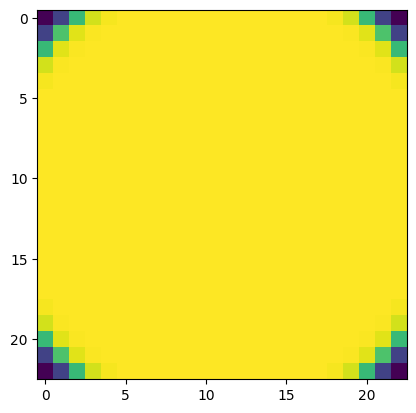

In [8]:
# Establish ideal grid
ss = int(2*(D/2 + 4*w/2)-1)
os = (ss-1)//2
xx, yy, zz = np.meshgrid(np.arange(-os,os+1), np.arange(-os,os+1), np.arange(-os,os+1), indexing='ij')
r = np.sqrt(xx**2 + yy**2 + zz**2)
ipi = ipf3D(r, D, w)

NameError: name 'D' is not defined

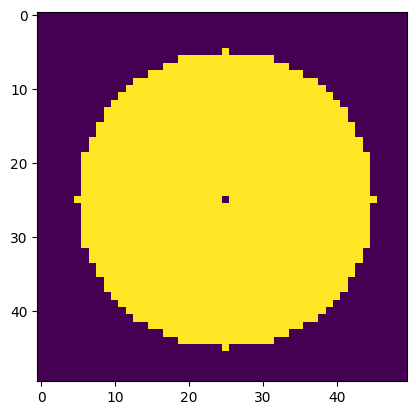

In [163]:
l = 25
r = 20

x,y = np.ogrid[-l:l,-l:l]
gri = np.sqrt(x**2+y**2)

gri[gri > r] = 0
gri[gri != 0] = 1
plt.imshow(gri)

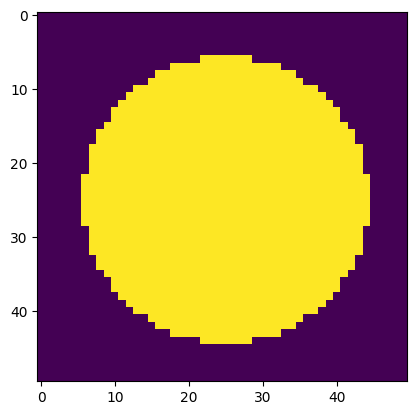

In [167]:
l = 25
r = 20

x,y,z = np.ogrid[-l:l,-l:l,-l:l]
gri = np.sqrt(x**2+y**2+z**2)

gri[gri > r] = 0
gri[gri != 0] = 1
plt.imshow(gri[:,:,r])

11 11 11
(3, 11, 11, 11)


TypeError: Invalid shape (3, 11, 11) for image data

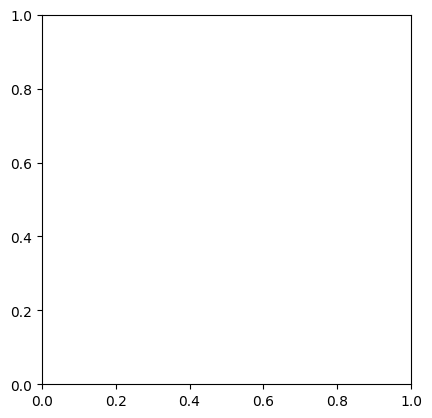

In [98]:
size = 100
radius = 10

gri = np.mgrid[-1:10:1,-1:10:1,-1:10:1]
a,b,c = np.mgrid[-1:10:1,-1:10:1,-1:10:1]
print(len(a),len(b),len(c))
print(gri.shape)
plt.imshow(gri[:,:,1])

x, y, z = np.mgrid[-1:size:1, -1:size:1, -1:size:1]
r = np.sqrt(x**2 + y**2 + z**2)
r[r > radius] = 0

plt.imshow(r[:,:,1])

In [ ]:
a = int(50*np.round(scale,2))
blank = np.zeros(shape=(a,a,a))
blank[]

11 (11, 11, 11)


[-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11] [[[-11 -11 -11 ... -11 -11 -11]
  [-11 -11 -11 ... -11 -11 -11]
  [-11 -11 -11 ... -11 -11 -11]
  ...
  [-11 -11 -11 ... -11 -11 -11]
  [-11 -11 -11 ... -11 -11 -11]
  [-11 -11 -11 ... -11 -11 -11]]

 [[-10 -10 -10 ... -10 -10 -10]
  [-10 -10 -10 ... -10 -10 -10]
  [-10 -10 -10 ... -10 -10 -10]
  ...
  [-10 -10 -10 ... -10 -10 -10]
  [-10 -10 -10 ... -10 -10 -10]
  [-10 -10 -10 ... -10 -10 -10]]

 [[ -9  -9  -9 ...  -9  -9  -9]
  [ -9  -9  -9 ...  -9  -9  -9]
  [ -9  -9  -9 ...  -9  -9  -9]
  ...
  [ -9  -9  -9 ...  -9  -9  -9]
  [ -9  -9  -9 ...  -9  -9  -9]
  [ -9  -9  -9 ...  -9  -9  -9]]

 ...

 [[  9   9   9 ...   9   9   9]
  [  9   9   9 ...   9   9   9]
  [  9   9   9 ...   9   9   9]
  ...
  [  9   9   9 ...   9   9   9]
  [  9   9   9 ...   9   9   9]
  [  9   9   9 ...   9   9   9]]

 [[ 10  10  10 ...  10  10  10]
  [ 10  10  10 ...  10  10  10]
  [ 10  10  10 ...  10  10  10]
  .

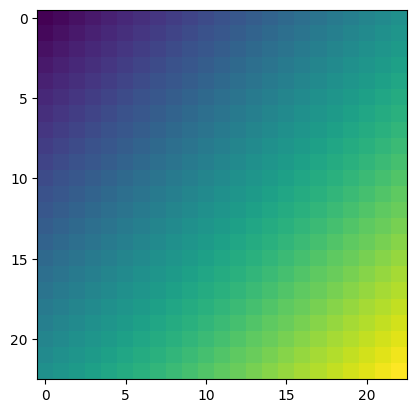

In [59]:
a = int(50*np.round(scale,2))

lens = np.arange(-a,a+1)
rr,cc,zz = np.meshgrid(lens,lens,lens, indexing='ij')
print(lens,rr)
tot = rr+cc+zz
dog = np.copy(tot)
#dog[dog[]]
plt.imshow(tot[:,:,10])

In [ ]:
dist = D/2

In [41]:
rr,cc,zz = np.meshgrid([0,1],[0,1],[0,1])
topHat = np.sqrt(rr**2+cc**2+zz**2)

print(topHat.shape)

print(np.arange(-10,10+1))

#plt.imshow(topHat[:,:,3])

(2, 2, 2)
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


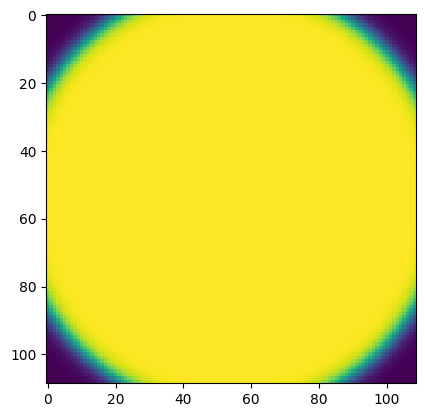

In [14]:
plt.imshow(ipi[:,:,10])